# Treinamento da Rede YOLO

Desafio de Projeto

Autor: Israel de Castro Evangelista

Objetivo: Projeto de criação de uma base de dados e treinamento da rede YOLO.

## Conectando o Drive

In [12]:
%cd ..

from google.colab import drive
drive.mount('/content/gdrive')

/content/gdrive/MyDrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [14]:
!nvidia-smi

Fri Apr 14 01:31:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


### Criando a pasta yolov4 e connect

In [16]:
!mkdir /mydrive/yolov4/

mkdir: cannot create directory ‘/mydrive/yolov4/’: File exists


In [17]:
%cd /mydrive/yolov4

/content/gdrive/My Drive/yolov4


## Clonando Darknet

In [18]:
!git clone https://github.com/AlexeyAB/darknet.git

fatal: destination path 'darknet' already exists and is not an empty directory.


In [19]:
!mkdir /mydrive/yolov4/training

mkdir: cannot create directory ‘/mydrive/yolov4/training’: File exists


## Dataset

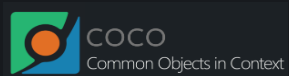

### Instalando CocoDataset

In [20]:
!pip install CocoDataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip annotations_trainval2014.zip

--2023-04-14 01:31:47--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.171.97, 52.217.198.169, 52.217.191.25, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.171.97|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  68.9MB/s    in 3.6s    

2023-04-14 01:31:51 (66.5 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]

Archive:  annotations_trainval2014.zip
replace annotations/instances_train2014.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: annotations/instances_train2014.json  
  inflating: annotations/instances_val2014.json  
  inflating: annotations/person_keypoints_train2014.json  
  inflating: annotations/person_keypoints_val2014.json  
  inflating: annotations/captions_train2014.json

In [22]:
!rm -r annotations_trainval2014.zip

### Classe Person

In [23]:
from coco_dataset import coco_dataset_download as cocod

class_name = "person"
images_count = 30
annotations_path = '/content/gdrive/MyDrive/yolov4/annotations/instances_train2014.json'

cocod.coco_dataset_download(class_name, images_count, annotations_path)

loading annotations into memory...
Done (t=22.50s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
no.of image: 11
no.of image: 12
no.of image: 13
no.of image: 14
no.of image: 15
no.of image: 16
no.of image: 17
no.of image: 18
no.of image: 19
no.of image: 20
no.of image: 21
no.of image: 22
no.of image: 23
no.of image: 24
no.of image: 25
no.of image: 26
no.of image: 27
no.of image: 28
no.of image: 29
no.of image: 30
finished images download


In [24]:
!mkdir darknet/data/obj

mkdir: cannot create directory ‘darknet/data/obj’: File exists


In [25]:
!mv person/*.jpg darknet/data/obj/

In [26]:
!rm -r person

### Classe Horse

In [27]:
class_name = "horse"
images_count = 50
annotations_path = '/content/gdrive/MyDrive/yolov4/annotations/instances_train2014.json'

cocod.coco_dataset_download(class_name, images_count, annotations_path)

loading annotations into memory...
Done (t=11.88s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
no.of image: 11
no.of image: 12
no.of image: 13
no.of image: 14
no.of image: 15
no.of image: 16
no.of image: 17
no.of image: 18
no.of image: 19
no.of image: 20
no.of image: 21
no.of image: 22
no.of image: 23
no.of image: 24
no.of image: 25
no.of image: 26
no.of image: 27
no.of image: 28
no.of image: 29
no.of image: 30
no.of image: 31
no.of image: 32
no.of image: 33
no.of image: 34
no.of image: 35
no.of image: 36
no.of image: 37
no.of image: 38
no.of image: 39
no.of image: 40
no.of image: 41
no.of image: 42
no.of image: 43
no.of image: 44
no.of image: 45
no.of image: 46
no.of image: 47
no.of image: 48
no.of image: 49
no.of image: 50
finished images download


In [28]:
!mv horse/*jpg darknet/data/obj

In [29]:
!rm -r horse

In [30]:
%cd darknet

/content/gdrive/MyDrive/yolov4/darknet


## Baixando Pesos

In [31]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-04-14 01:33:10--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.3’

yolov3.weights.3    100%[===================>] 236.52M  50.0MB/s    in 4.9s    

2023-04-14 01:33:15 (48.0 MB/s) - ‘yolov3.weights.3’ saved [248007048/248007048]



## Compilando

In [32]:
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/OPENMP=0/OPENMP=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [33]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -fopenmp -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_old == 0

## Visualizando Imagens

In [34]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## Testando Pesos

In [35]:
!ls

3rdparty		darknet_video.py       README.md
backup			data		       results
build			image_yolov3.sh        scripts
build.ps1		image_yolov4.sh        src
cfg			include		       uselib
cmake			json_mjpeg_streams.sh  vcpkg.json
CMakeLists.txt		libdarknet.so	       vcpkg.json.opencv23
darknet			LICENSE		       video_yolov3.sh
darknet53.conv.74	Makefile	       video_yolov4.sh
darknet53.conv.74.1	net_cam_v3.sh	       yolov3.weights
DarknetConfig.cmake.in	net_cam_v4.sh	       yolov3.weights.1
darknet_images.py	obj		       yolov3.weights.2
darknet.py		predictions.jpg        yolov3.weights.3


 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595

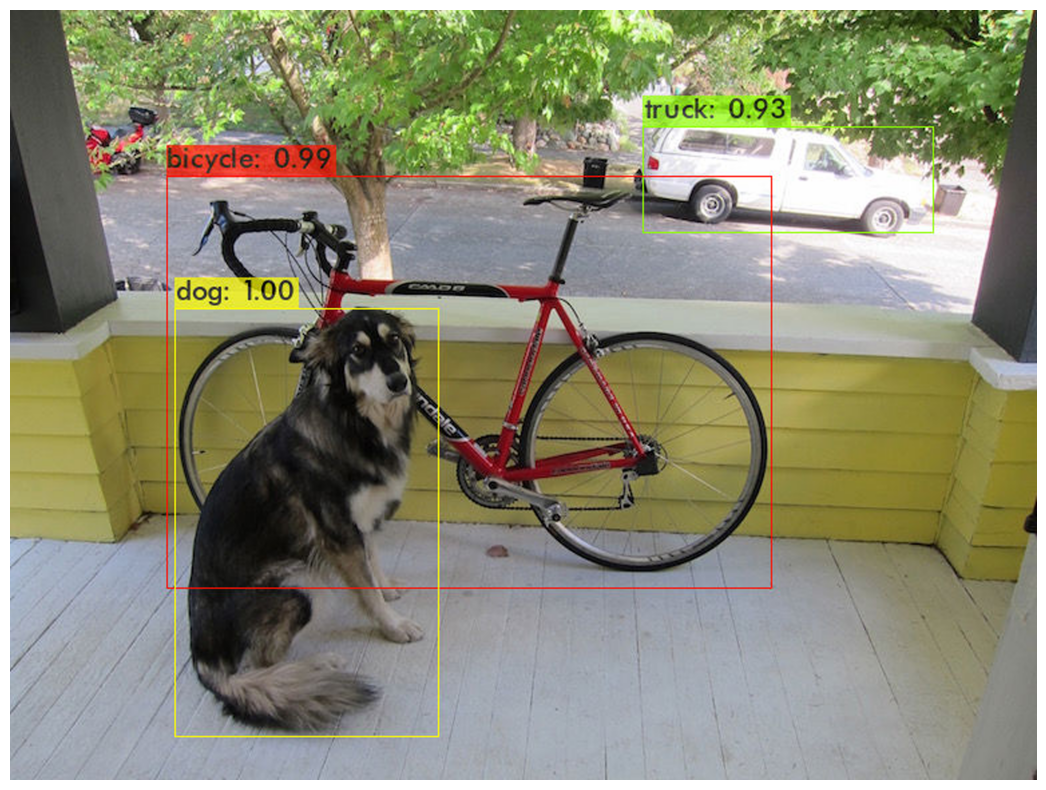

In [36]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

imShow('predictions.jpg')

## Criando Arquivos

In [37]:
with open('data/obj.data', 'w') as f:
  data = ['classes=2', 'train = data/train.txt', 'valid = data/test.txt', 'names = data/obj.names', 'backup = /mydrive/yolov4/training']
  [f.write(f'{i}\n') for i in data]

In [38]:
with open('data/obj.names', 'w') as f:
  data = ["person", "horse"]
  [f.write(f'{i}\n') for i in data] 

In [39]:
with open('data/train.txt', 'w') as f:
  f.write('')

with open('data/test.txt', 'w') as f:
    f.write('')

In [40]:
import glob, os


current_dir = 'data/obj/'

# Percentual de Imagens para serem usadas no test
percentage_test = 10;

# Criando e/ou truncando train.txt e test.txt
file_train = open('data/train.txt', 'w')
file_test = open('data/test.txt', 'w')

# Populando train.txt e test.txt
counter = 1
index_test = round(100 / percentage_test)
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))

    if counter == index_test:
        counter = 1
        file_test.write("data/obj" + "/" + title + '.jpg' + "\n")
    else:
        file_train.write("data/obj" + "/" + title + '.jpg' + "\n")
        counter = counter + 1

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595

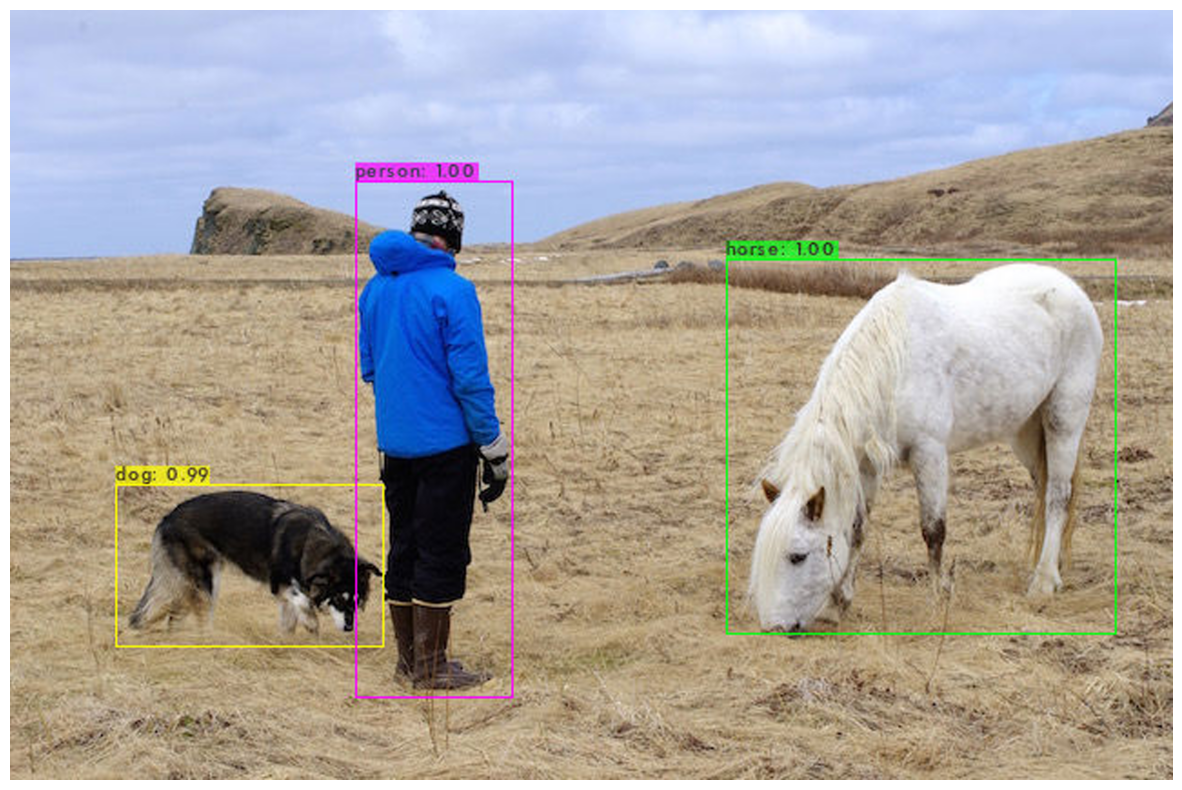

In [41]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

imShow('predictions.jpg')

## Baixando Modelo

In [42]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-04-14 01:35:51--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.2’

darknet53.conv.74.2 100%[===================>] 154.96M  35.2MB/s    in 4.2s    

2023-04-14 01:35:55 (36.9 MB/s) - ‘darknet53.conv.74.2’ saved [162482580/162482580]



In [43]:
!./darknet detector train data/obj.data cfg/yolov3-tiny_3l.cfg darknet53.conv.74 -dont_show -map

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  16 0.319 BF
   1 max                2x 2/ 2    608 x 608 x  16 ->  304 x 304 x  16 0.006 BF
   2 conv     32       3 x 3/ 1    304 x 304 x  16 ->  304 x 304 x  32 0.852 BF
   3 max                2x 2/ 2    304 x 304 x  32 ->  152 x 152 x  32 0.003 BF
   4 conv     64       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  64 0.852 BF
   5 max                2x 2/ 2    152 x 152 x  64 ->   76 x  76 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     76 x  76 x  64 ->   76 x  76 x 128 0.852 BF
   7 max            

In [44]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-tiny_3l.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-tiny_3l.cfg
%cd ..

/content/gdrive/MyDrive/yolov4/darknet/cfg
/content/gdrive/MyDrive/yolov4/darknet


 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  16 0.319 BF
   1 max                2x 2/ 2    608 x 608 x  16 ->  304 x 304 x  16 0.006 BF
   2 conv     32       3 x 3/ 1    304 x 304 x  16 ->  304 x 304 x  32 0.852 BF
   3 max                2x 2/ 2    304 x 304 x  32 ->  152 x 152 x  32 0.003 BF
   4 conv     64       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  64 0.852 BF
   5 max                2x 2/ 2    152 x 152 x  64 ->   76 x  76 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     76 x  76 x  64 ->   76 x  76 x 128 0.852 BF
   7 max                2x 2/ 2     76 x  76 x 128 ->   38 x  38 x 128 

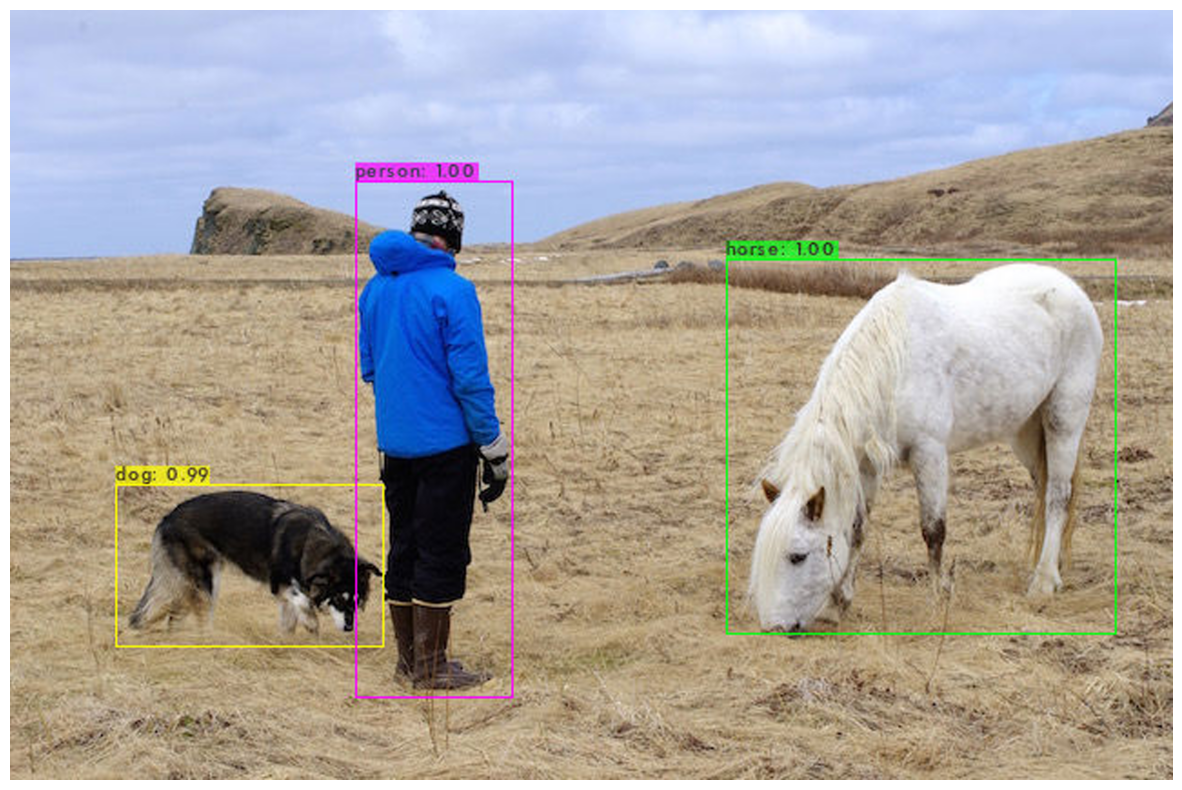

In [45]:
!./darknet detector test data/obj.data cfg/yolov3-tiny_3l.cfg /mydrive/yolov4/training/yolov3-tiny_3l_last.weights data/obj/COCO_train2014_000000040988.jpg -thresh 0.3

imShow('predictions.jpg')